In [4]:
import matplotlib.pyplot as plt
import torch
from model import VesselSegmentationModel
from arcade_dataset import load_dataset

In [5]:
model = VesselSegmentationModel.load_from_checkpoint(
    "models/epoch=13-step=1750.ckpt", in_channels=3
).cuda()
model.eval()

VesselSegmentationModel(
  (model): UNet(
    (encoder): UNetEncoder(
      (initial_conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (blocks): ModuleList(
        (0): ResBlock(
          (residual): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (block): Sequential(
            (0): GroupNorm(8, 32, eps=1e-05, affine=True)
            (1): ReLU()
            (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): GroupNorm(8, 32, eps=1e-05, affine=True)
            (4): ReLU()
            (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (1): Sequential(
          (0): ResBlock(
            (residual): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
            (block): Sequential(
              (0): GroupNorm(8, 32, eps=1e-05, affine=True)
              (1): ReLU()
              (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
         

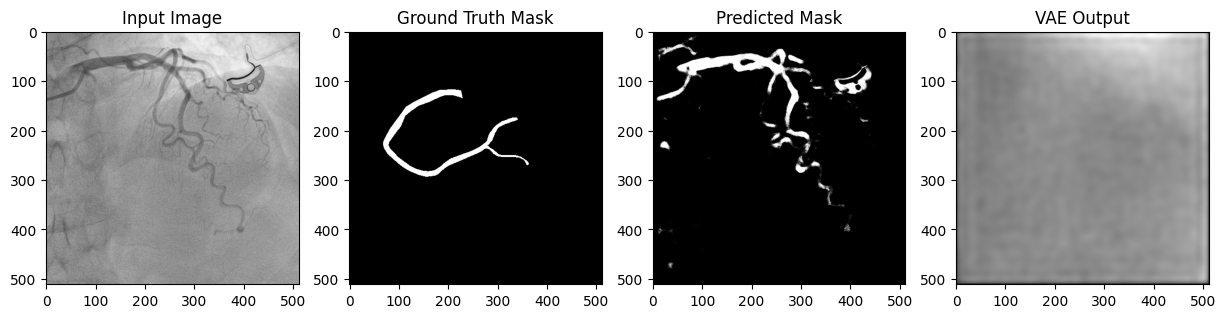

In [17]:
dataset = load_dataset("val")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
batch = next(iter(dataloader))

x, y_gt = batch['transformed_image'].cuda(), batch['masks'].cuda()
decoder_output, vae_output, _, _ = model(x)

plt.subplots(figsize=(15, 5), ncols=4)
plt.subplot(1, 4, 1)
plt.imshow(x[0, 0, :, :].cpu().numpy(), cmap='gray')
plt.title('Input Image')
plt.subplot(1, 4, 2)
plt.imshow(y_gt[0, 0, :, :].cpu().numpy(), cmap='gray')
plt.title('Ground Truth Mask')
plt.subplot(1, 4, 3)
plt.imshow(decoder_output[0, 0, :, :].detach().cpu().numpy(), cmap='gray')
plt.title('Predicted Mask')
plt.subplot(1, 4, 4)
plt.imshow(vae_output[0, 0, :, :].detach().cpu().numpy(), cmap='gray')
plt.title('VAE Output')
plt.show()